In [1]:
# Program to plot tracks for Hurricane Isaac (2012)
#
# Joseph B.zambon
#  jbzambon@ncsu.edu
#  29 January 2020

In [2]:
# conda create --name isaac_track
# conda activate isaac_track
# conda install jupyter
# conda install -c conda-forge netcdf4
# conda install -c conda-forge matplotlib
# conda install -c conda-forge basemap
# conda install -c conda-forge basemap-data-hires

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import numpy as np
import csv
get_ipython().magic(u'pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [3]:
nclout = './data/isaac_uncoupled_ncl.nc'
nclout = Dataset(nclout,'r')
lat   = np.array(nclout.variables['lat'][0,:,:])
lon   = np.array(nclout.variables['lon'][0,:,:])

In [4]:
# NHC BEST TRACK
best_track_csv = './data/isaac_besttrack.csv'
rows = [] 
# reading csv file 
with open(best_track_csv, 'r') as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 

best_track = rows[25:40][:]
best_track = np.reshape(best_track,(15,7))
best_track = best_track.astype(float)
best_track[:,4] = best_track[:,4]*-1

besttrack_datetime = []
for t in arange(0,np.size(best_track[:,0])):
    besttrack_datetime.append(datetime.datetime(2012,int(best_track[t,0]),int(best_track[t,1]),int(best_track[t,2]),0,0))

In [6]:
# WRF UNCOUPLED SIMULATION
uncoupled_wrf_csv = './data/isaac_uncoupled_track.csv'
rows = [] 
# reading csv file 
with open(uncoupled_wrf_csv, 'r') as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile,delimiter=',') 
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 

uncoupled_track = rows[:][:]
uncoupled_track = np.reshape(uncoupled_track,(85,4))
uncoupled_track = uncoupled_track.astype(float)

uncoupledtrack_datetime = []
for t in arange(0,np.size(uncoupled_track[:,0])):
    uncoupledtrack_datetime.append(datetime.datetime(2012,8,26,12,0,0) + datetime.timedelta(hours=int(t)))

In [7]:
# ENSEMBLE MEAN
ensemble_mean_csv = './data/isaac_coupled_ens_mean.csv'
rows = [] 
# reading csv file 
with open(ensemble_mean_csv, 'r') as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile,delimiter=' ') 
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 

ensemble_mean_track = rows[3:][:]
ensemble_mean_track = np.reshape(ensemble_mean_track,(83,5))
ensemble_mean_track = ensemble_mean_track.astype(float)

ensemblemeantrack_datetime = []
for t in arange(0,np.size(ensemble_mean_track[:,0])):
    ensemblemeantrack_datetime.append(datetime.datetime(2012,8,26,13,0,0) + datetime.timedelta(hours=int(t)))

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


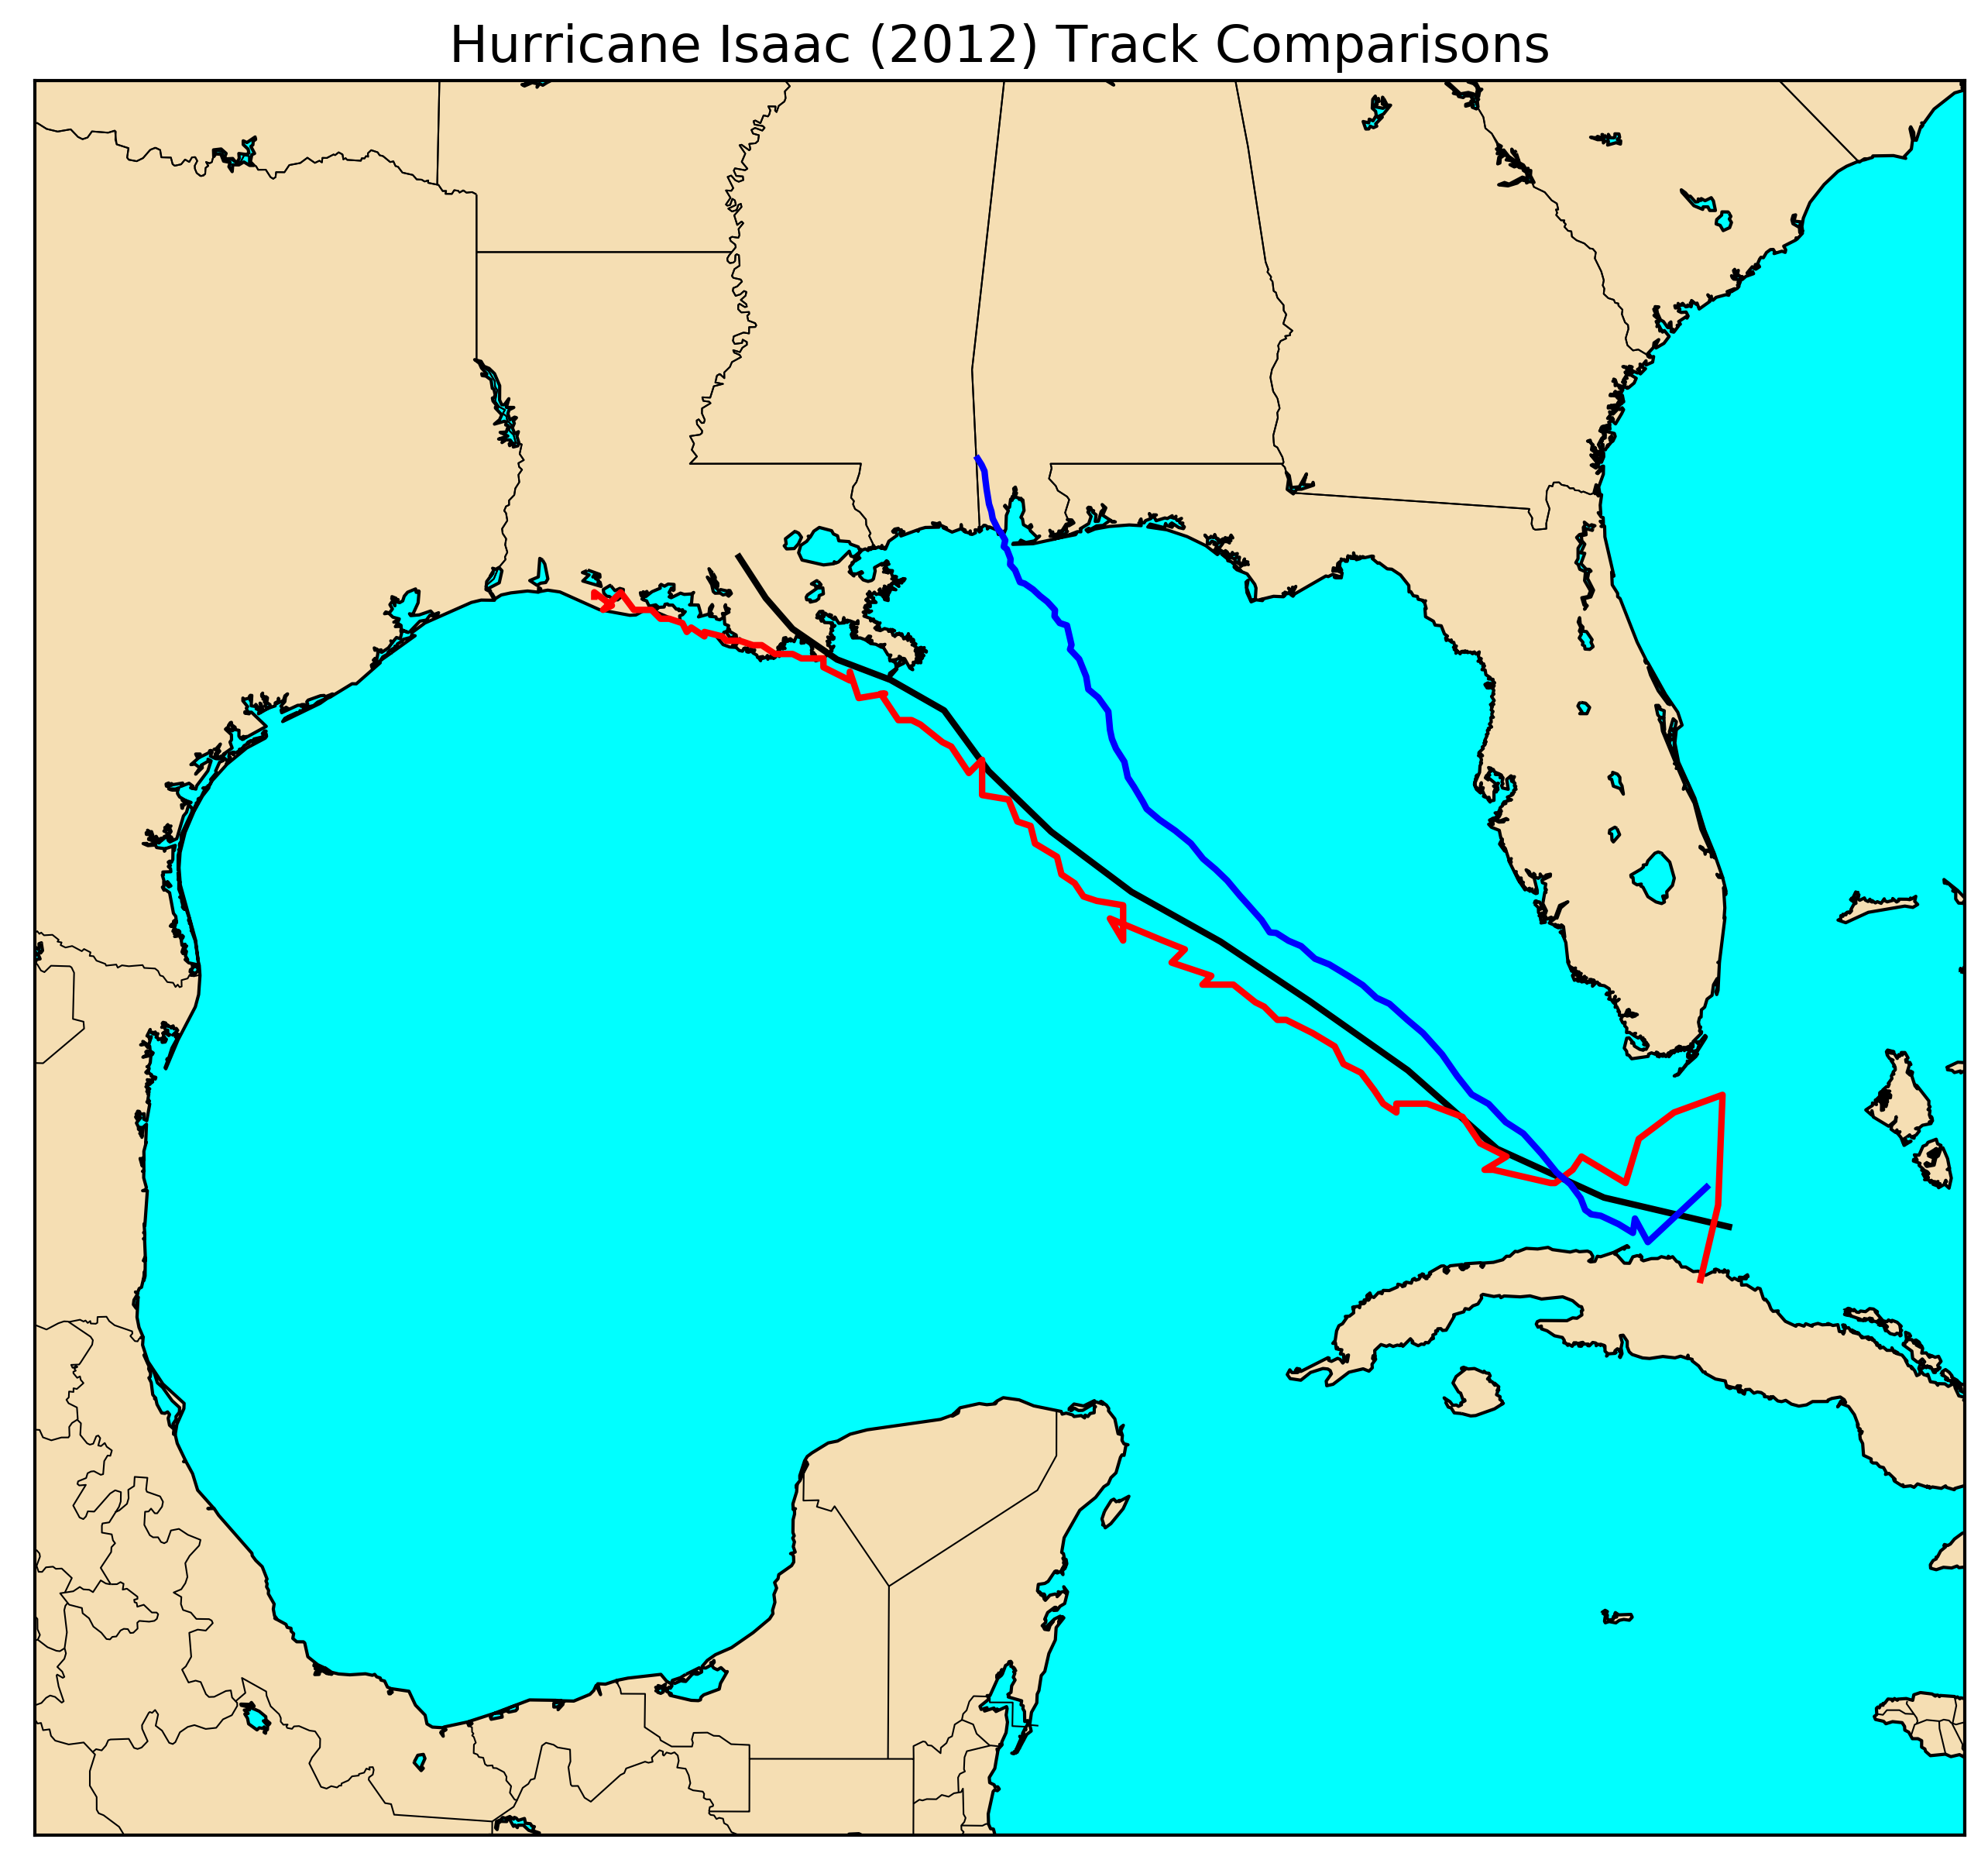

In [8]:
fig1=plt.figure(figsize=(15,10),dpi=300)
map = Basemap(projection='merc',
    resolution='i',lat_0=((np.max(lat)-np.min(lat))/2),
    lon_0=((np.max(lon)-np.min(lon))/2),
    llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),
    urcrnrlon=np.max(lon),urcrnrlat=np.max(lat))
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='wheat',lake_color='aqua')
map.drawcoastlines()
map.drawcountries()
map.drawstates()
x,y=map(best_track[:,4],best_track[:,3])
map.plot(x,y,'-',linewidth=2,color='k')
x,y=map(uncoupled_track[:,1],uncoupled_track[:,0])
map.plot(x,y,'-',linewidth=2,color='r')
x,y=map(ensemble_mean_track[:,1],ensemble_mean_track[:,2])
map.plot(x,y,'-',linewidth=2,color='b')
plt.title(('Hurricane Isaac (2012) Track Comparisons'),fontsize=16,family='Helvetica')
plt.savefig('./images/isaac_track')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


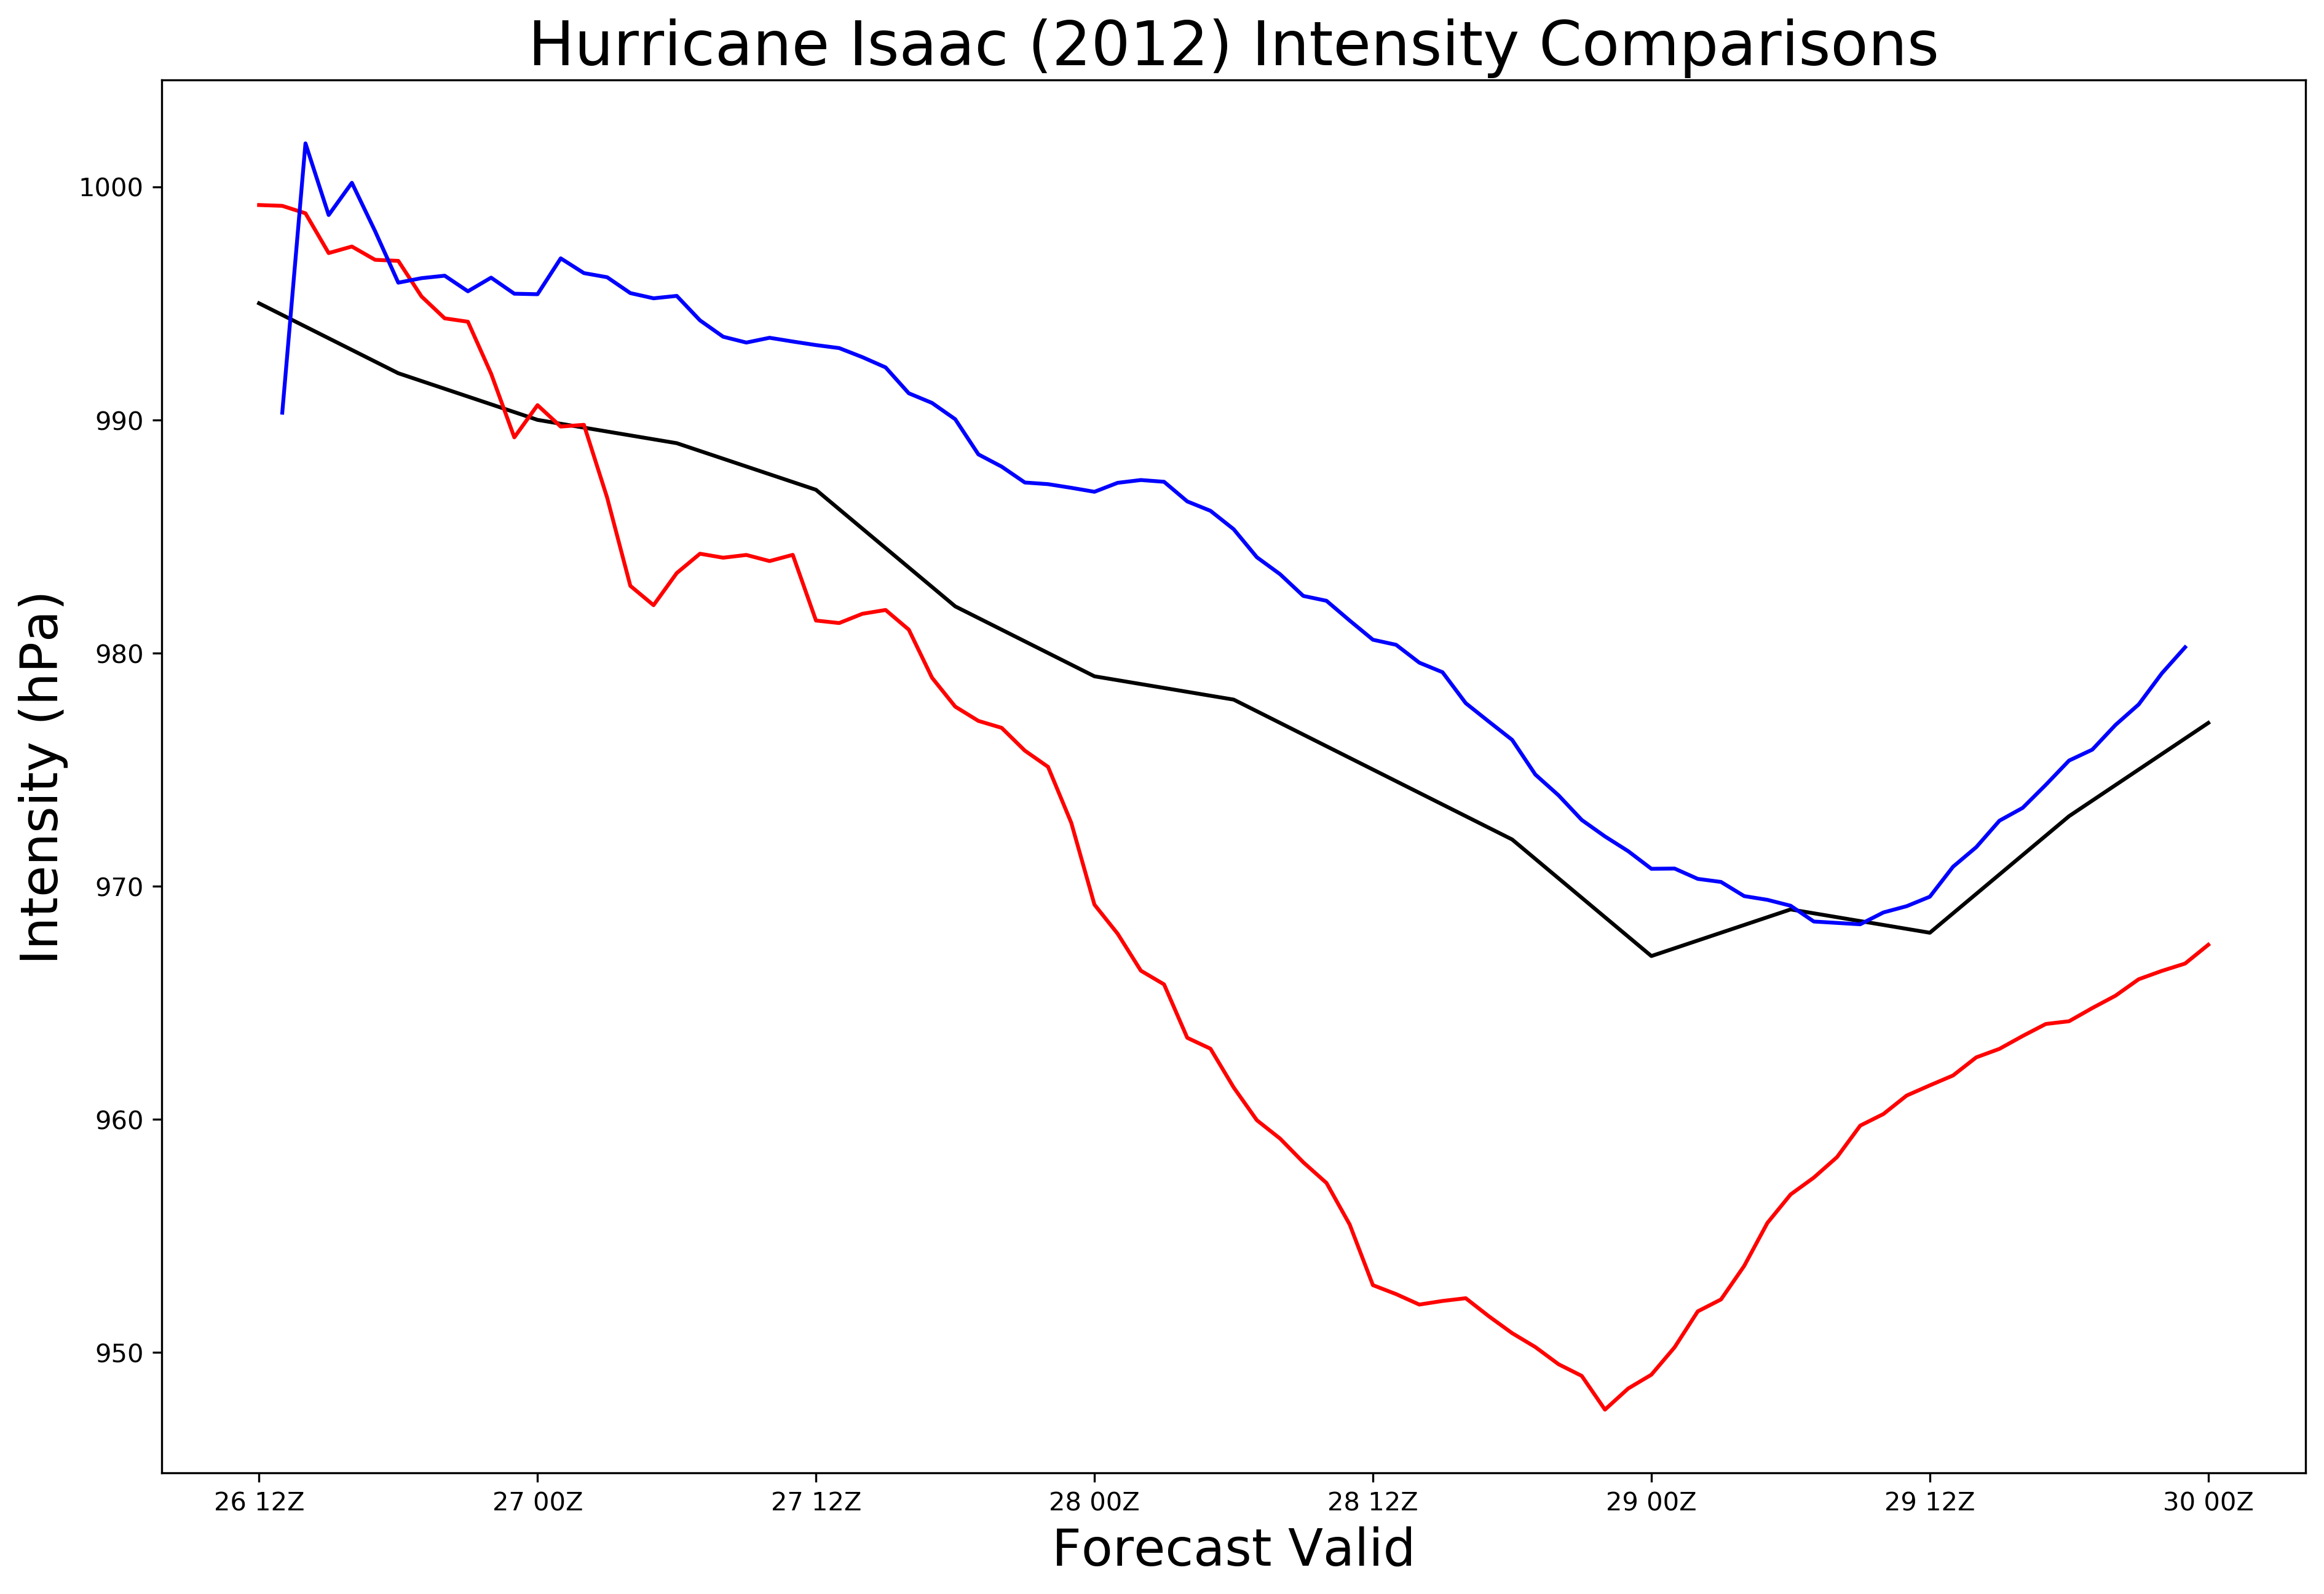

In [9]:
fig1, ax=plt.subplots(figsize=(15,10),dpi=300)
plt.title(('Hurricane Isaac (2012) Intensity Comparisons'),fontsize=24,family='Helvetica')
plt.plot(besttrack_datetime,best_track[:,5],'k')
plt.plot(uncoupledtrack_datetime,uncoupled_track[:,2],'r')
plt.plot(ensemblemeantrack_datetime,ensemble_mean_track[:,3],'b')
ax.set_ylabel('Intensity (hPa)',fontsize=20)
ax.set_xlabel('Forecast Valid',fontsize=20)
years_fmt = mdates.DateFormatter('%d %HZ')
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig('./images/isaac_intensity')

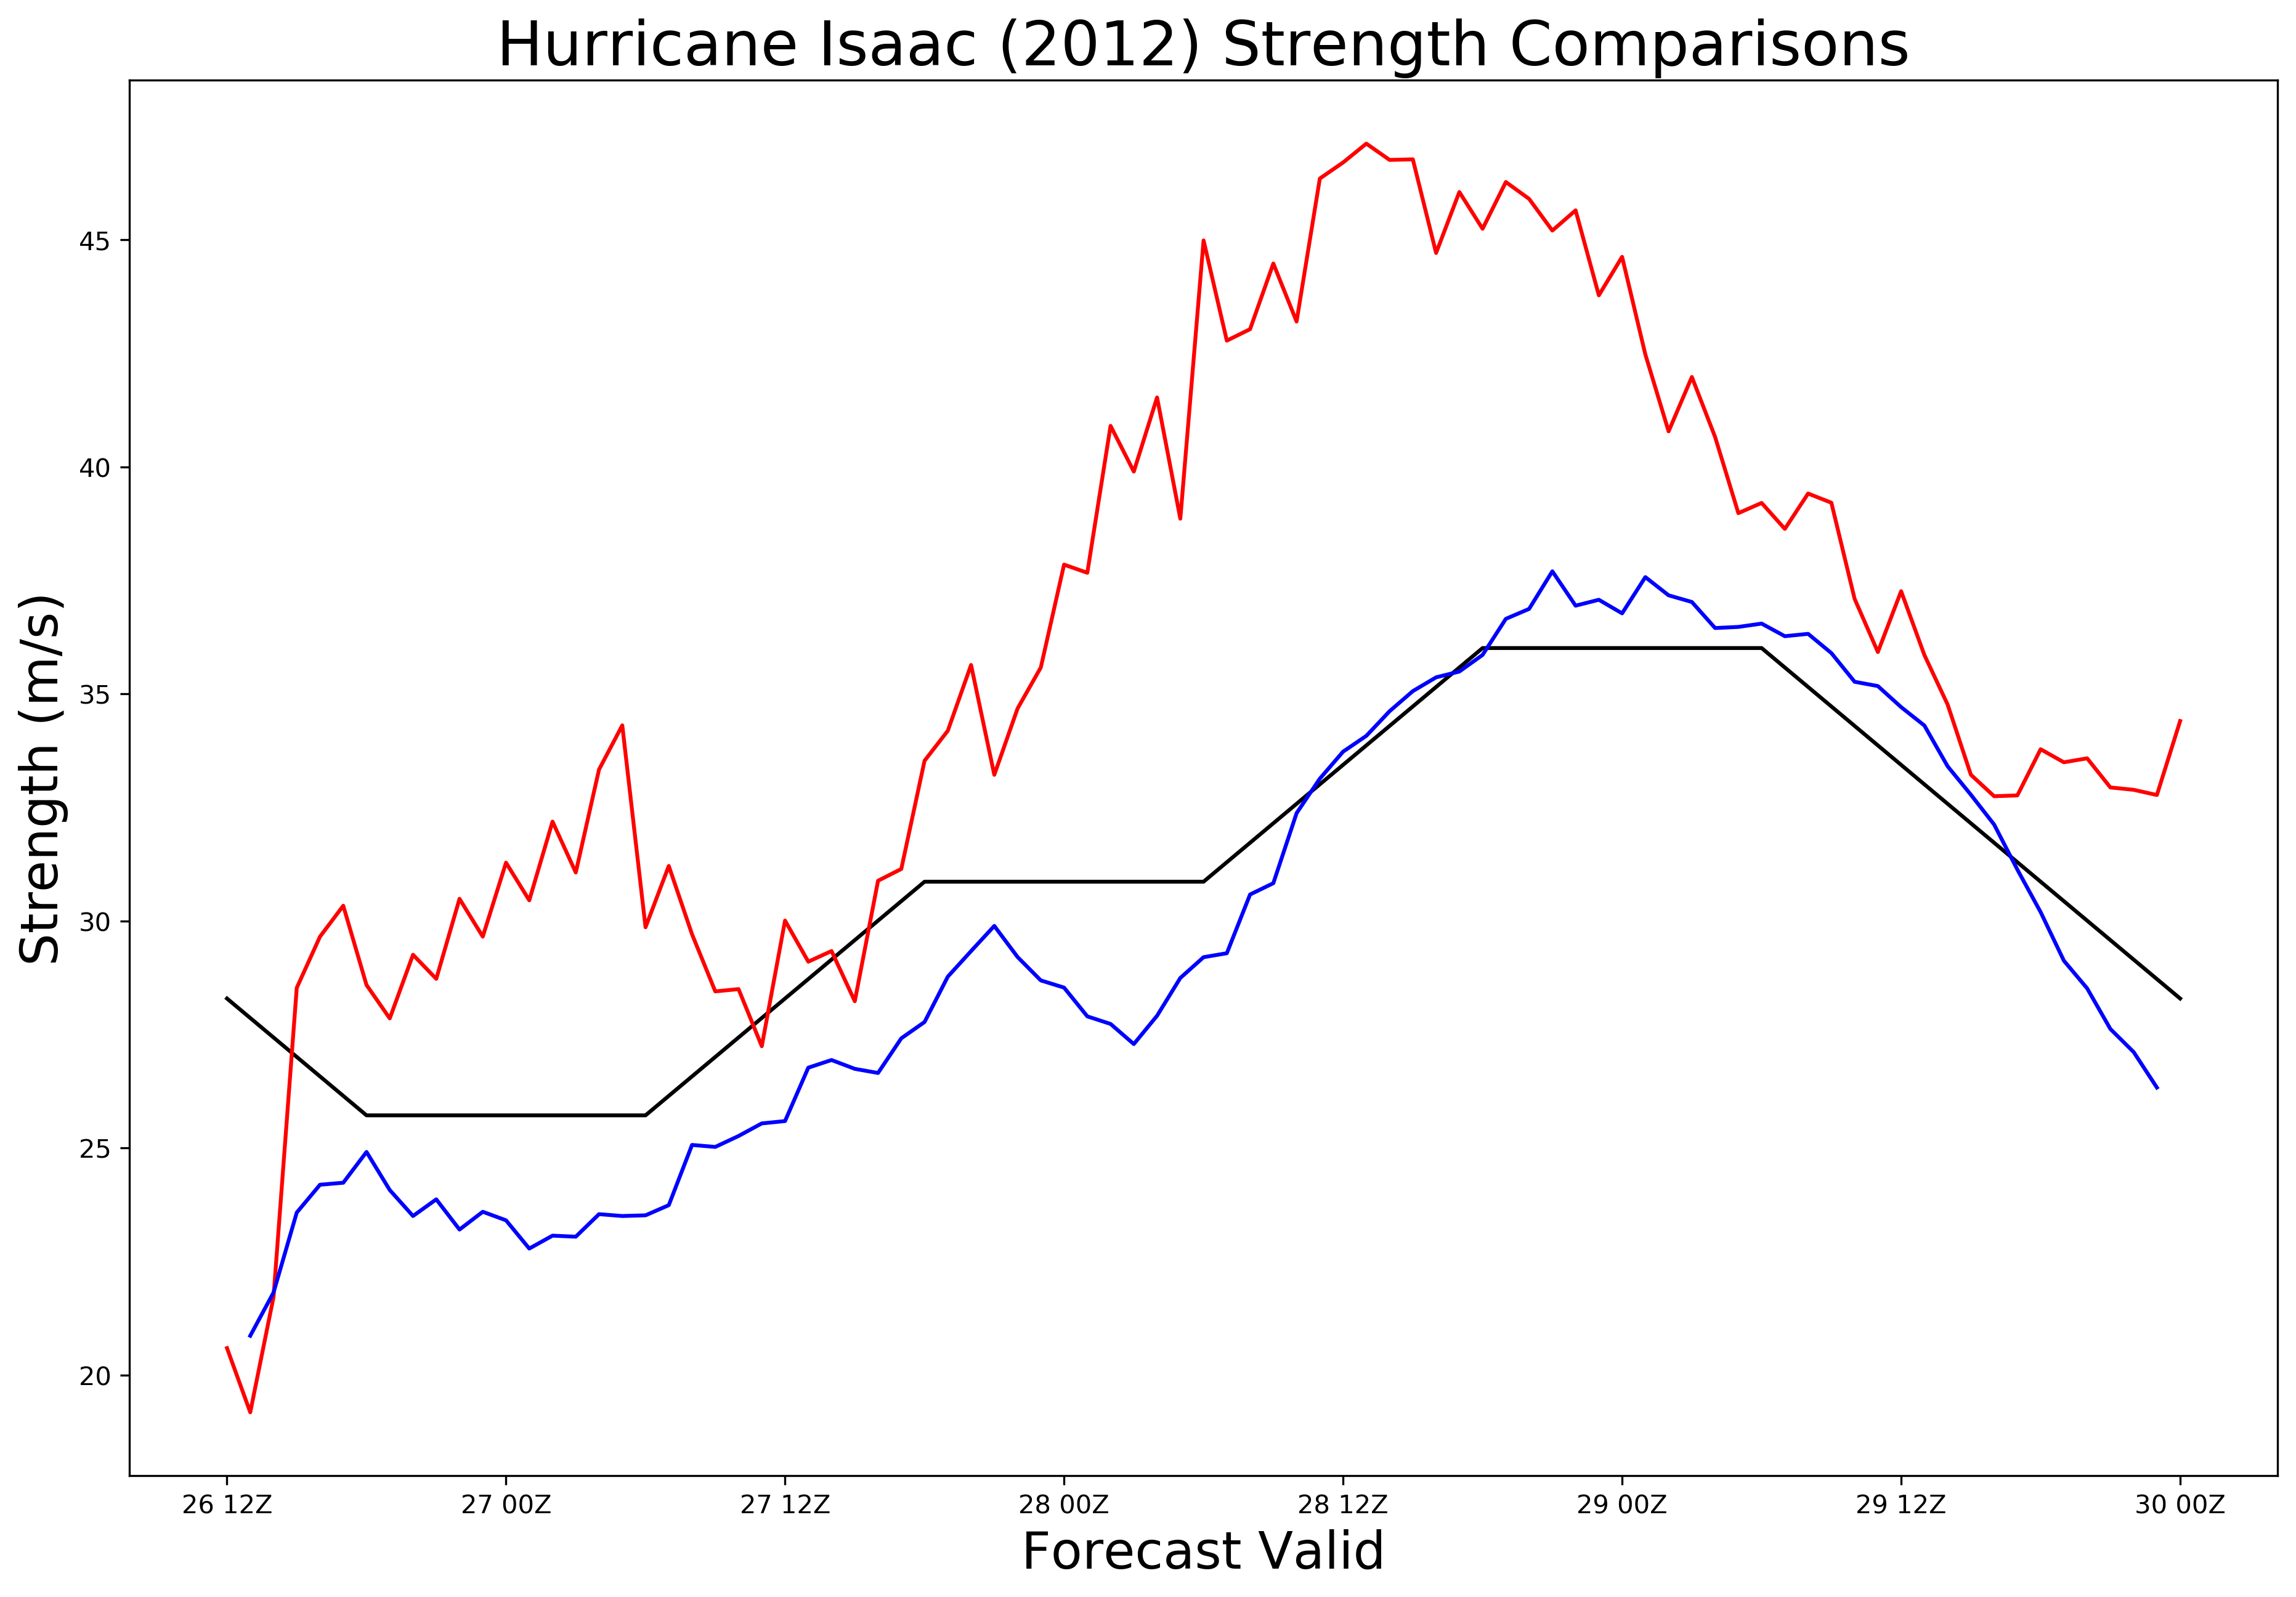

In [10]:
fig1, ax=plt.subplots(figsize=(15,10),dpi=300)
plt.title(('Hurricane Isaac (2012) Strength Comparisons'),fontsize=24,family='Helvetica')
plt.plot(besttrack_datetime,best_track[:,6]*0.514444,'k')
plt.plot(uncoupledtrack_datetime,uncoupled_track[:,3],'r')
plt.plot(ensemblemeantrack_datetime,ensemble_mean_track[:,4],'b')
ax.set_ylabel('Strength (m/s)',fontsize=20)
ax.set_xlabel('Forecast Valid',fontsize=20)
years_fmt = mdates.DateFormatter('%d %HZ')
ax.xaxis.set_major_formatter(years_fmt)
plt.savefig('./images/isaac_strength')